## 1. Apa itu Data Storytelling?

### Definisi

**Data Storytelling** adalah seni dan sains mengkomunikasikan insight dari data melalui kombinasi:
- 📊 **Data** - Informasi yang akurat dan relevan
- 📖 **Narrative** - Cerita yang membentuk konteks
- 🎨 **Visualization** - Representasi visual yang efektif

### Data Storytelling vs Visualisasi Biasa

| Aspek | Visualisasi Biasa | Data Storytelling |
|-------|-------------------|-------------------|
| **Tujuan** | Menampilkan data | Mengkomunikasikan insight |
| **Konteks** | Minimal | Kaya konteks |
| **Narasi** | Tidak ada | Ada alur cerita |
| **Audience** | Generic | Targeted |
| **Actionable** | Jarang | Selalu ada rekomendasi |

### Mengapa Data Storytelling Penting?

1. **🧠 Meningkatkan Pemahaman**: Data mentah sulit dipahami, cerita membuatnya accessible
2. **💡 Mempengaruhi Keputusan**: Cerita yang kuat mendorong aksi konkret
3. **🎯 Memorable**: Orang mengingat cerita 22x lebih baik daripada fakta mentah
4. **🤝 Engagement**: Membuat audience tertarik dan terlibat emosional
5. **🚀 Persuasif**: Kombinasi data + emosi = powerful communication

---

## 2. Setup Environment

Mari kita install dan import library yang diperlukan untuk data storytelling:

In [1]:
# Import library dasar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime, timedelta

# Konfigurasi
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Display settings untuk pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

# Matplotlib settings
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.size'] = 10

print("✅ Library berhasil di-import!")
print(f"📦 Pandas version: {pd.__version__}")
print(f"📦 NumPy version: {np.__version__}")
print(f"📦 Matplotlib version: {plt.matplotlib.__version__}")
print(f"📦 Seaborn version: {sns.__version__}")
print("\n🎨 Style dan konfigurasi siap digunakan!")

✅ Library berhasil di-import!
📦 Pandas version: 2.3.1
📦 NumPy version: 2.2.6
📦 Matplotlib version: 3.10.7
📦 Seaborn version: 0.13.2

🎨 Style dan konfigurasi siap digunakan!


## 3. Generate Sample Data

Kita akan membuat dataset penjualan yang realistic untuk 3 produk selama 12 bulan:

In [2]:
# Set random seed untuk reproducibility
np.random.seed(42)

# Buat data penjualan untuk 3 produk selama 12 bulan
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Product A: Steady growth (trending product)
product_a = [120, 135, 148, 152, 165, 180, 195, 205, 220, 235, 260, 290]

# Product B: Declining (needs attention)
product_b = [200, 195, 185, 178, 170, 165, 160, 155, 150, 145, 140, 135]

# Product C: Rising star (accelerating growth)
product_c = [80, 85, 95, 110, 125, 145, 160, 180, 195, 215, 240, 270]

# Buat DataFrame
df_sales = pd.DataFrame({
    'Month': months,
    'Product_A': product_a,
    'Product_B': product_b,
    'Product_C': product_c
})

# Tambahkan kolom total
df_sales['Total'] = df_sales[['Product_A', 'Product_B', 'Product_C']].sum(axis=1)

print("📊 Dataset Penjualan Tahun 2024")
print("="*60)
print(df_sales)

print("\n📈 Statistik Ringkasan:")
print("="*60)
print(df_sales.describe().round(2))

# Hitung pertumbuhan
growth_a = ((product_a[-1] - product_a[0]) / product_a[0] * 100)
growth_b = ((product_b[0] - product_b[-1]) / product_b[0] * 100)  # Penurunan
growth_c = ((product_c[-1] - product_c[0]) / product_c[0] * 100)

print(f"\n💹 Year-over-Year Growth:")
print(f"  • Product A: +{growth_a:.1f}%")
print(f"  • Product B: -{growth_b:.1f}% (declining)")
print(f"  • Product C: +{growth_c:.1f}%")

📊 Dataset Penjualan Tahun 2024
   Month  Product_A  Product_B  Product_C  Total
0    Jan        120        200         80    400
1    Feb        135        195         85    415
2    Mar        148        185         95    428
3    Apr        152        178        110    440
4    May        165        170        125    460
5    Jun        180        165        145    490
6    Jul        195        160        160    515
7    Aug        205        155        180    540
8    Sep        220        150        195    565
9    Oct        235        145        215    595
10   Nov        260        140        240    640
11   Dec        290        135        270    695

📈 Statistik Ringkasan:
       Product_A  Product_B  Product_C  Total
count      12.00      12.00      12.00  12.00
mean      192.08     164.83     158.33 515.25
std        52.12      21.31      62.75  94.20
min       120.00     135.00      80.00 400.00
25%       151.00     148.75     106.25 437.00
50%       187.50     162.50     

## 4. Visualisasi BURUK ❌

Mari kita lihat contoh visualisasi yang **TIDAK EFEKTIF** - tanpa story, tanpa konteks, tanpa insight:

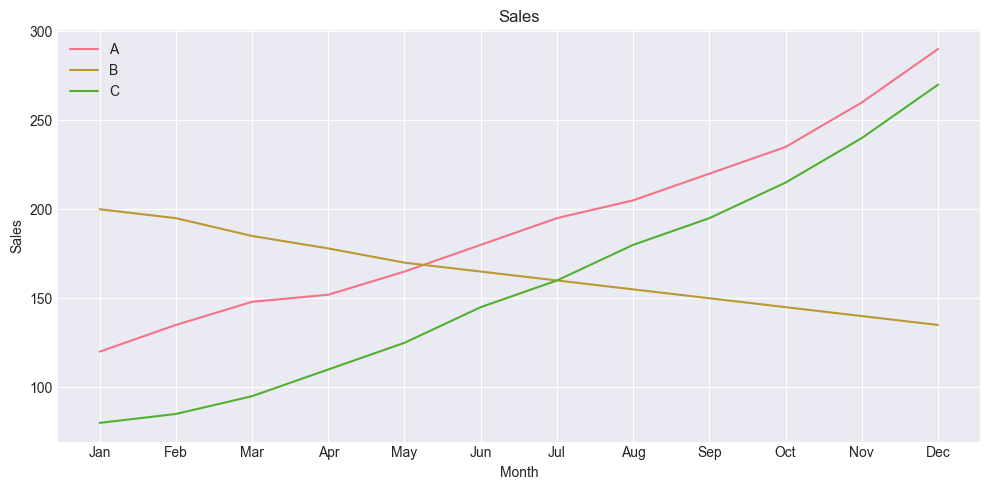


⚠️ MASALAH dengan visualisasi di atas:
❌ Judul tidak informatif ('Sales' - sales apa? siapa? kenapa?)
❌ Tidak ada konteks atau latar belakang
❌ Tidak ada insight yang di-highlight
❌ Tidak ada narasi atau kesimpulan
❌ Label dan legend tidak deskriptif
❌ Tidak ada call-to-action
❌ Warna default, tidak meaningful
❌ Tidak ada annotations untuk key points

💡 Ini hanya menampilkan data, BUKAN menceritakan story!


In [3]:
# Contoh visualisasi BURUK - minimal effort, no story
plt.figure(figsize=(10, 5))

# Plot dasar tanpa customization
plt.plot(df_sales['Month'], df_sales['Product_A'])
plt.plot(df_sales['Month'], df_sales['Product_B'])
plt.plot(df_sales['Month'], df_sales['Product_C'])

# Label minimal
plt.title('Sales')
plt.legend(['A', 'B', 'C'])
plt.xlabel('Month')
plt.ylabel('Sales')

plt.tight_layout()
plt.show()

print("\n⚠️ MASALAH dengan visualisasi di atas:")
print("="*60)
print("❌ Judul tidak informatif ('Sales' - sales apa? siapa? kenapa?)")
print("❌ Tidak ada konteks atau latar belakang")
print("❌ Tidak ada insight yang di-highlight")
print("❌ Tidak ada narasi atau kesimpulan")
print("❌ Label dan legend tidak deskriptif")
print("❌ Tidak ada call-to-action")
print("❌ Warna default, tidak meaningful")
print("❌ Tidak ada annotations untuk key points")
print("\n💡 Ini hanya menampilkan data, BUKAN menceritakan story!")

## 5. Visualisasi BAIK ✅

Sekarang mari kita transform visualisasi tersebut menjadi **DATA STORY** yang compelling:

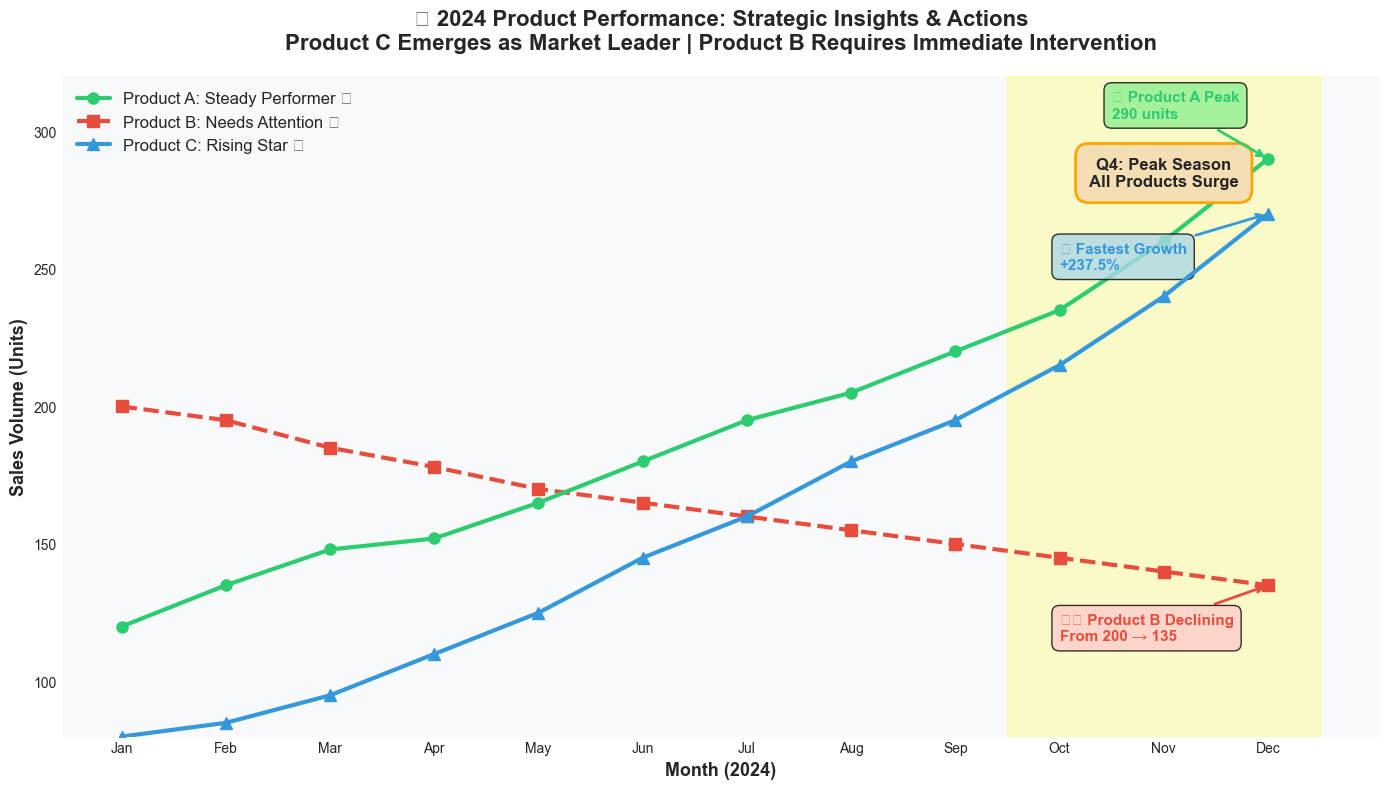


✅ ELEMEN STORYTELLING yang Ditambahkan:
✨ Judul informatif dan menarik perhatian
✨ Subtitle yang merangkum key insights
✨ Warna yang meaningful (hijau=sukses, merah=warning, biru=growth)
✨ Highlight periode penting (Q4 peak season)
✨ Annotations untuk insight utama
✨ Legend yang deskriptif dengan emoji
✨ Markers berbeda untuk setiap produk
✨ Grid untuk memudahkan pembacaan nilai
✨ Background color untuk better contrast


In [4]:
# Visualisasi BAIK - dengan storytelling elements
fig, ax = plt.subplots(figsize=(14, 8))

# Plot dengan styling yang meaningful
line_a = ax.plot(df_sales['Month'], df_sales['Product_A'], 
                 marker='o', linewidth=3, markersize=8,
                 color='#2ecc71', label='Product A: Steady Performer 📈', 
                 zorder=3)

line_b = ax.plot(df_sales['Month'], df_sales['Product_B'], 
                 marker='s', linewidth=3, markersize=8,
                 color='#e74c3c', label='Product B: Needs Attention 📉',
                 linestyle='--', zorder=2)

line_c = ax.plot(df_sales['Month'], df_sales['Product_C'], 
                 marker='^', linewidth=3, markersize=8,
                 color='#3498db', label='Product C: Rising Star ⭐',
                 zorder=4)

# Highlight periode Q4 (peak performance)
ax.axvspan(8.5, 11.5, alpha=0.2, color='yellow', zorder=1)
ax.text(10, 280, 'Q4: Peak Season\nAll Products Surge', 
        fontsize=12, weight='bold', ha='center',
        bbox=dict(boxstyle='round,pad=0.8', facecolor='wheat', 
                  edgecolor='orange', linewidth=2))

# Annotate puncak Product A
ax.annotate('🎯 Product A Peak\n290 units', 
            xy=(11, 290), xytext=(9.5, 305),
            fontsize=11, weight='bold', color='#2ecc71',
            arrowprops=dict(arrowstyle='->', lw=2, color='#2ecc71'),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightgreen', alpha=0.8))

# Annotate penurunan Product B
ax.annotate('⚠️ Product B Declining\nFrom 200 → 135', 
            xy=(11, 135), xytext=(9, 115),
            fontsize=11, weight='bold', color='#e74c3c',
            arrowprops=dict(arrowstyle='->', lw=2, color='#e74c3c'),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='#ffcccb', alpha=0.8))

# Annotate pertumbuhan Product C
ax.annotate('🚀 Fastest Growth\n+237.5%', 
            xy=(11, 270), xytext=(9, 250),
            fontsize=11, weight='bold', color='#3498db',
            arrowprops=dict(arrowstyle='->', lw=2, color='#3498db'),
            bbox=dict(boxstyle='round,pad=0.5', facecolor='lightblue', alpha=0.8))

# Styling dan formatting
ax.set_title('📊 2024 Product Performance: Strategic Insights & Actions\n' +
             'Product C Emerges as Market Leader | Product B Requires Immediate Intervention',
             fontsize=16, weight='bold', pad=20)

ax.set_xlabel('Month (2024)', fontsize=13, weight='bold')
ax.set_ylabel('Sales Volume (Units)', fontsize=13, weight='bold')

ax.legend(loc='upper left', fontsize=12, framealpha=0.95, 
          shadow=True, fancybox=True)

ax.grid(True, alpha=0.3, linestyle=':', linewidth=1)
ax.set_facecolor('#f8f9fa')

# Set limits untuk better view
ax.set_ylim(80, 320)

plt.tight_layout()
plt.show()

print("\n✅ ELEMEN STORYTELLING yang Ditambahkan:")
print("="*60)
print("✨ Judul informatif dan menarik perhatian")
print("✨ Subtitle yang merangkum key insights")
print("✨ Warna yang meaningful (hijau=sukses, merah=warning, biru=growth)")
print("✨ Highlight periode penting (Q4 peak season)")
print("✨ Annotations untuk insight utama")
print("✨ Legend yang deskriptif dengan emoji")
print("✨ Markers berbeda untuk setiap produk")
print("✨ Grid untuk memudahkan pembacaan nilai")
print("✨ Background color untuk better contrast")

## 6. Framework Data Storytelling

### The Story Arc Structure

Setiap data story yang baik mengikuti struktur naratif klasik:

```
1. SETUP (Context)
   └─> Siapa? Apa? Dimana? Kapan? Mengapa?
   
2. RISING ACTION (Data & Analysis)
   └─> Tunjukkan pola, tren, dan temuan
   
3. CLIMAX (Insight Utama)
   └─> Highlight discovery atau revelation kunci
   
4. RESOLUTION (Conclusion & Action)
   └─> Kesimpulan dan rekomendasi konkret
```

### 4 Elemen Penting

1. **📍 CONTEXT (Konteks)**
   - Siapa audience Anda?
   - Apa yang perlu mereka ketahui?
   - Mengapa ini penting bagi mereka?
   - Apa situasi saat ini?

2. **📊 DATA (Data)**
   - Data yang akurat dan relevan
   - Cleaning dan preprocessing
   - Analisis yang mendalam
   - Validasi dan verification

3. **📖 NARRATIVE (Narasi)**
   - Beginning: Setup/pengenalan
   - Middle: Analisis dan temuan
   - End: Kesimpulan dan rekomendasi
   - Flow yang logis

4. **🎨 VISUALIZATION (Visualisasi)**
   - Pilih chart yang tepat
   - Gunakan warna efektif
   - Highlight insight utama
   - Simplify - less is more

---

## 7. Narasi Lengkap dengan Metrics

Mari kita buat narasi lengkap untuk melengkapi visualisasi:

In [5]:
print("=" * 80)
print(" " * 20 + "📖 DATA STORY: 2024 Product Performance Analysis")
print("=" * 80)

# === 1. SETUP: CONTEXT ===
print("\n🔍 CONTEXT (Latar Belakang)")
print("-" * 80)
print("""
Di awal 2024, perusahaan kami meluncurkan 3 produk utama untuk menargetkan
segmen pasar yang berbeda:
  • Product A: Mid-range product untuk mass market
  • Product B: Premium product untuk high-end segment  
  • Product C: Budget-friendly option untuk price-sensitive customers

Setelah 12 bulan operasi, kita perlu mengevaluasi performa masing-masing
produk untuk merencanakan strategi 2025.
""")

# === 2. RISING ACTION: DATA & FINDINGS ===
print("\n📊 DATA & FINDINGS (Temuan Data)")
print("-" * 80)

# Calculate metrics
product_a_growth = ((product_a[-1] - product_a[0]) / product_a[0] * 100)
product_a_total = sum(product_a)
product_a_avg = np.mean(product_a)

product_b_decline = ((product_b[0] - product_b[-1]) / product_b[0] * 100)
product_b_total = sum(product_b)
product_b_avg = np.mean(product_b)

product_c_growth = ((product_c[-1] - product_c[0]) / product_c[0] * 100)
product_c_total = sum(product_c)
product_c_avg = np.mean(product_c)

total_sales = product_a_total + product_b_total + product_c_total

print(f"\n🟢 Product A (Steady Performer):")
print(f"   • Growth: +{product_a_growth:.1f}% (120 → 290 units)")
print(f"   • Total Sales: {product_a_total:,} units ({product_a_total/total_sales*100:.1f}% market share)")
print(f"   • Average Monthly: {product_a_avg:.0f} units")
print(f"   • Trend: Konsisten naik sepanjang tahun")
print(f"   • Best Month: December (290 units)")

print(f"\n🔴 Product B (Needs Attention):")
print(f"   • Decline: -{product_b_decline:.1f}% (200 → 135 units)")
print(f"   • Total Sales: {product_b_total:,} units ({product_b_total/total_sales*100:.1f}% market share)")
print(f"   • Average Monthly: {product_b_avg:.0f} units")
print(f"   • Trend: Terus menurun sejak Januari")
print(f"   • Worst Month: December (135 units)")

print(f"\n🔵 Product C (Rising Star):")
print(f"   • Growth: +{product_c_growth:.1f}% (80 → 270 units)")
print(f"   • Total Sales: {product_c_total:,} units ({product_c_total/total_sales*100:.1f}% market share)")
print(f"   • Average Monthly: {product_c_avg:.0f} units")
print(f"   • Trend: Akselerasi kuat di semester 2")
print(f"   • Best Month: December (270 units)")

# === 3. CLIMAX: KEY INSIGHTS ===
print("\n\n💡 KEY INSIGHTS (Temuan Utama)")
print("-" * 80)
print("""
1. 🎯 Product-Market Fit:
   • Product A dan C menunjukkan product-market fit yang sangat kuat
   • Product B kehilangan market appeal - possible pricing or quality issue

2. 🚀 Growth Trajectory:
   • Product C adalah bintang baru dengan pertumbuhan tercepat (+237.5%)
   • Demand untuk budget-friendly option sangat tinggi

3. 📈 Seasonal Pattern:
   • Q4 adalah peak season untuk semua produk sukses
   • November-December sales spike significantly

4. ⚠️ Market Shift:
   • Customer preferences bergeser dari premium (B) ke value (C) dan mid-range (A)
   • Economic factors mungkin mempengaruhi buying behavior

5. 💰 Revenue Opportunity:
   • Product C low price point tapi high volume = significant revenue potential
   • Product A stable growth = reliable revenue stream
""")

# === 4. RESOLUTION: RECOMMENDATIONS ===
print("\n🎯 STRATEGIC RECOMMENDATIONS (Rekomendasi Aksi)")
print("-" * 80)
print("""
IMMEDIATE ACTIONS (Next 30 Days):
1. 🔴 Product B Crisis Management
   → Conduct urgent customer research (surveys, interviews)
   → Analyze competitor offerings in premium segment
   → Consider pricing adjustment or feature enhancement
   → Evaluate discontinuation if no turnaround path

2. 🟢 Product A Optimization
   → Increase marketing budget by 20% to sustain momentum
   → Optimize supply chain for Q4 2025 peak demand
   → Expand distribution channels

3. 🔵 Product C Scale-Up
   → DOUBLE production capacity immediately
   → Aggressive marketing campaign for 2025 Q1
   → Explore product line extensions (variants, accessories)

MEDIUM-TERM STRATEGY (3-6 Months):
4. 📊 Portfolio Rebalancing
   → Shift resources from Product B to Product C
   → Consider A+C bundling for cross-selling opportunities
   → Develop loyalty program focusing on C customers

5. 🎯 Q4 Preparation
   → Build inventory 3 months ahead of Q4 2025
   → Pre-book marketing channels (ads, influencers)
   → Train sales team on A and C upselling

LONG-TERM VISION (6-12 Months):
6. 🚀 Market Expansion
   → Launch Product C in new geographic markets
   → Develop "Product C Pro" (mid-tier version)
   → Build brand equity in value segment

EXPECTED OUTCOMES:
• 2025 Revenue Target: +45% YoY
• Product C to become #1 seller (40% market share)
• Product A to maintain 35% market share
• Product B: Pivot or phase out by Q2 2025
""")

print("\n" + "=" * 80)
print(" " * 25 + "End of Data Story Analysis")
print("=" * 80)

                    📖 DATA STORY: 2024 Product Performance Analysis

🔍 CONTEXT (Latar Belakang)
--------------------------------------------------------------------------------

Di awal 2024, perusahaan kami meluncurkan 3 produk utama untuk menargetkan
segmen pasar yang berbeda:
  • Product A: Mid-range product untuk mass market
  • Product B: Premium product untuk high-end segment  
  • Product C: Budget-friendly option untuk price-sensitive customers

Setelah 12 bulan operasi, kita perlu mengevaluasi performa masing-masing
produk untuk merencanakan strategi 2025.


📊 DATA & FINDINGS (Temuan Data)
--------------------------------------------------------------------------------

🟢 Product A (Steady Performer):
   • Growth: +141.7% (120 → 290 units)
   • Total Sales: 2,305 units (37.3% market share)
   • Average Monthly: 192 units
   • Trend: Konsisten naik sepanjang tahun
   • Best Month: December (290 units)

🔴 Product B (Needs Attention):
   • Decline: -32.5% (200 → 135 units)
   • T

## 8. Best Practices Checklist

### ✅ DO (Lakukan):

1. **Start with Why**
   - Mulai dengan pertanyaan atau masalah yang jelas
   - Explain mengapa analysis ini penting

2. **Know Your Audience**
   - Executives? → Focus on high-level insights
   - Technical team? → Include methodology details
   - General public? → Simplify jargon

3. **Use Visual Hierarchy**
   - Most important info → Biggest, boldest, first
   - Supporting details → Smaller, lighter

4. **Highlight What Matters**
   - Use color strategically untuk draw attention
   - Annotations untuk explain key points

5. **Keep It Simple**
   - One chart, one message
   - Remove unnecessary elements (chart junk)

6. **Provide Context**
   - Comparisons (vs last year, vs target, vs industry)
   - Benchmarks and reference lines

7. **End with Action**
   - Clear, specific recommendations
   - Next steps yang actionable

### ❌ DON'T (Hindari):

1. **Too Much Data**
   - Jangan cramming banyak info dalam satu chart
   - Use multiple charts jika perlu

2. **Misleading Visuals**
   - Truncated axes yang exaggerate differences
   - Inappropriate chart types

3. **Rainbow Colors**
   - Limit to 3-5 colors
   - Use color purposefully, not decoratively

4. **Unclear Conclusions**
   - "The data shows..." is not a conclusion
   - "Therefore, we should..." is better

5. **No Call to Action**
   - Don't leave audience wondering "so what?"
   - Always include recommendations

---

## 9. Exercise: Customer Satisfaction Analysis

### 📝 Task:
Buatlah data story lengkap untuk kasus berikut:

**Scenario:**
Sebuah e-commerce company melacak customer satisfaction di 4 area:
- Customer Service
- Product Quality  
- Delivery Speed
- Price Value

Data dikumpulkan selama 6 bulan terakhir. Anda diminta untuk:

1. ✅ Identifikasi area yang perlu improvement
2. ✅ Buat visualisasi dengan storytelling elements
3. ✅ Tulis narasi lengkap (Context → Insights → Recommendations)
4. ✅ Berikan rekomendasi actionable

### Data:

In [6]:
# Data customer satisfaction (skala 1-5)
satisfaction_data = {
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Customer_Service': [4.2, 4.3, 4.1, 4.4, 4.5, 4.6],
    'Product_Quality': [3.8, 3.9, 3.7, 3.6, 3.5, 3.4],
    'Delivery_Speed': [4.5, 4.6, 4.7, 4.8, 4.8, 4.9],
    'Price_Value': [3.5, 3.6, 3.8, 4.0, 4.1, 4.3]
}

df_satisfaction = pd.DataFrame(satisfaction_data)

print("📊 Customer Satisfaction Data (Scale 1-5)")
print("="*60)
print(df_satisfaction)

print("\n📈 Statistics:")
print(df_satisfaction.describe().round(2))

# TODO: Kerjakan exercise di bawah ini!
print("\n" + "="*60)
print("💪 YOUR TASK: Create a complete data story!")
print("="*60)
print("""
Tips:
1. Analyze the trends - which areas improving? declining?
2. Create a visualization with storytelling elements
3. Use appropriate colors (green for good, red for concern)
4. Add annotations for key insights
5. Write a narrative with context and recommendations
6. Think: What would a CEO want to know?
""")

📊 Customer Satisfaction Data (Scale 1-5)
  Month  Customer_Service  Product_Quality  Delivery_Speed  Price_Value
0   Jan              4.20             3.80            4.50         3.50
1   Feb              4.30             3.90            4.60         3.60
2   Mar              4.10             3.70            4.70         3.80
3   Apr              4.40             3.60            4.80         4.00
4   May              4.50             3.50            4.80         4.10
5   Jun              4.60             3.40            4.90         4.30

📈 Statistics:
       Customer_Service  Product_Quality  Delivery_Speed  Price_Value
count              6.00             6.00            6.00         6.00
mean               4.35             3.65            4.72         3.88
std                0.19             0.19            0.15         0.31
min                4.10             3.40            4.50         3.50
25%                4.22             3.52            4.62         3.65
50%                4

In [7]:
# SOLUTION SPACE - Kerjakan di sini!

# Step 1: Analyze the data
# TODO: Calculate growth/decline for each metric

# Step 2: Create visualization
# TODO: Create a compelling chart with annotations

# Step 3: Write narrative
# TODO: Context → Data → Insights → Recommendations

# Contoh starter code:
# fig, ax = plt.subplots(figsize=(14, 8))
# ... your code here ...

---

## 10. Kesimpulan

### 🎓 Apa yang Sudah Kita Pelajari:

1. ✅ **Definisi Data Storytelling**
   - Kombinasi Data + Narrative + Visualization
   - Lebih dari sekedar charts

2. ✅ **Perbedaan Visualisasi Biasa vs Storytelling**
   - Context matters
   - Narasi penting
   - Call to action essential

3. ✅ **Framework Storytelling**
   - Setup → Rising Action → Climax → Resolution
   - 4 Elemen: Context, Data, Narrative, Visualization

4. ✅ **Best Practices**
   - Simplicity, clarity, purpose
   - Strategic use of color dan annotations
   - Audience-focused approach

5. ✅ **Hands-on Implementation**
   - Setup environment
   - Generate dan analyze data
   - Create compelling visualizations
   - Write narratives dengan metrics

### 🎯 Next Steps:

**Module 2: Visualisasi untuk Storytelling**
- Chart selection framework
- Advanced matplotlib & seaborn techniques
- Color theory dan psychology
- Annotation mastery
- Small multiples dan dashboards

**Module 3: Advanced Data Storytelling**
- Real-world case studies
- Complex narratives
- Storyboarding
- Persuasion techniques

**Module 4: Interactive Dashboards**
- Plotly interactive charts
- Streamlit applications
- Deployment strategies

---

### 📚 Resources untuk Belajar Lebih Lanjut:

**Books:**
- "Storytelling with Data" - Cole Nussbaumer Knaflic
- "The Truthful Art" - Alberto Cairo
- "Data Visualization Handbook" - Andy Kirk

**Websites:**
- [Storytelling with Data Blog](https://www.storytellingwithdata.com/)
- [Information is Beautiful](https://informationisbeautiful.net/)
- [FlowingData](https://flowingdata.com/)

**Practice:**
- [Kaggle Datasets](https://www.kaggle.com/datasets)
- [Our World in Data](https://ourworldindata.org/)
- [FiveThirtyEight](https://fivethirtyeight.com/)

---

### 💬 Refleksi:

Sebelum melanjutkan ke modul berikutnya, tanyakan pada diri sendiri:

1. Apakah saya bisa explain perbedaan visualization vs storytelling?
2. Apakah saya understand 4 elemen data storytelling?
3. Apakah saya bisa create basic story dengan data?
4. Apa yang masih unclear dan perlu diperdalam?

**Keep practicing! Data storytelling is a skill yang improves dengan latihan.** 🚀

---

*End of Module 1*